In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

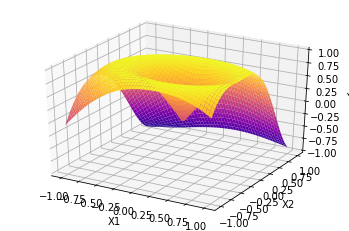

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

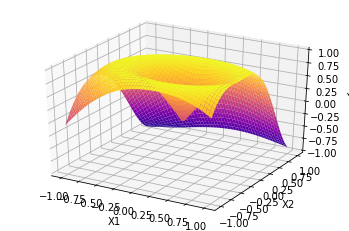

In [3]:
%matplotlib tk

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
# ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Using Neural Network

In [31]:
n_hidden = 1
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)

# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [5]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  2.335140569255327


100 Error =  0.11892645439830653


200 Error =  0.0710234580724066


300 Error =  0.0477422559700937


400 Error =  0.04064272446348987


500 Error =  0.03899308986160299


600 Error =  0.03860402744871485


700 Error =  0.03849683736286979


TclError: invalid command name "pyimage21"

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [6]:
error = (dy**2).mean()
error_list = [error,]
pre_err = error

# Repeat steps below to add new neuron to the network

In [7]:
from copy import deepcopy

### Adding new neurons at some point with zero output 

In [32]:
new_neurons = 5
noise_new = 0.0
noise_old = 0.0
noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1.weights.shape)
noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1.bias.shape)

layer1c = deepcopy(layer1)
layer2c = deepcopy(layer2)

l1_add = tnn.LinearLayer(2, new_neurons, optimizer=optimizer)
l2_add = tnn.DoubleReluLinearLayer(new_neurons, 1, optimizer=optimizer)

new_w1 = np.hstack([layer1.weights+noise_old_w1, l1_add.weights])
new_b1 = np.hstack([layer1.bias+noise_old_b1, l1_add.bias])

i, o = layer2.weights.shape
i_, o_ = l2_add.weights.shape
new_w2_ = np.concatenate([layer2.weights.reshape(2,i//2,o),
                          l2_add.weights.reshape(2,i_//2,o_)*noise_new],
                         axis=1)
new_w2 = new_w2_.reshape(-1, o)
new_b2 = deepcopy(layer2.bias)

## Creating a new network with added neuron

In [33]:
## creating new network with added neuron
optimizer = tnn.Adam()
# n_hidden = 2
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden,
                             weights=new_w1, bias=new_b1,
                             optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1,
                          weights=new_w2, bias=new_b2,
                          optimizer=optimizer)

In [34]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.3444175874165375


100 Error =  0.027663498518611242


200 Error =  0.021903332891552742


300 Error =  0.015797551059203264


400 Error =  0.014665336235413202


500 Error =  0.014289724736368857


600 Error =  0.014256650516253615


700 Error =  0.014252963164839235


800 Error =  0.01425234953360299


900 Error =  0.014252346547492356


1000 Error =  0.014252334534263849


1100 Error =  0.014252342801386365


1200 Error =  0.01425236498160691


1300 Error =  0.014252359759202372


1400 Error =  0.014252375812344498


1500 Error =  0.01425236463486079


TclError: invalid command name "pyimage78"

In [ ]:
pre_err - error   ### ---> the more the better

In [35]:
pre_err = error
error_list.append((dy**2).mean())

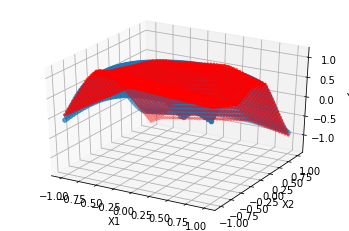

In [36]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

#### If the additional neuron was not helpful, reset the network

In [ ]:
### rest if the neuron added is not good enough
layer1 = deepcopy(layer1c)
layer2 = deepcopy(layer2c)

#### Total number of neurons

In [13]:
n_hidden = len(layer1.bias)
n_hidden

6

### Plot the independent non-linear units (neurons)

In [14]:
outs = []
for i in range(len(layer1.bias)):
    out = layer2.zee[:, i]*layer2.weights[i] + layer2.zee[:, i+n_hidden]*layer2.weights[i+n_hidden]
    outs.append(out)

In [15]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')

for i, out in enumerate(outs):
    ax.scatter(X1, X2, out.reshape(-1), color='g', marker='.', label=f'X,y_{i}')
#     plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')
    
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

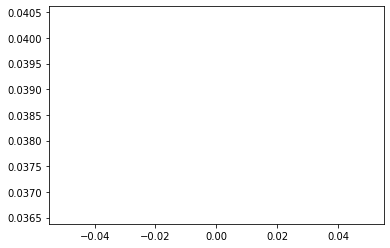

In [16]:
%matplotlib inline
plt.plot(error_list)

### Training the same network end to end

In [17]:
## creating new network with added neuron
optimizer = tnn.Adam()
net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)
# layer1_ = tnn.NonLinearLayer(2, n_hidden, activation=tnn.Relu(), optimizer=optimizer)
# layer2_ = tnn.LinearLayer(n_hidden, 1, optimizer=optimizer)

In [ ]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net_.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net_.backward(dy)
    
    net_.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Normalizing the weights

#### analsying weights

In [37]:
layer1.weights

array([[ 0.16399217,  0.29250046, -1.01158883, -1.03901837, -1.27758842,
        -0.23128123],
       [ 0.37358365, -2.15443578, -1.80684238, -1.40069179,  1.24079532,
        -2.30974234]])

In [38]:
lp_norm = 1

In [39]:
# norms = np.linalg.norm(layer1.weights, ord=2, axis=0, keepdims=True)
norms = np.linalg.norm(layer1.weights, ord=lp_norm, axis=0)
norms ### none of the neurons has magnitude(norm) = 1

array([0.53757582, 2.44693624, 2.81843121, 2.43971016, 2.51838374,
       2.54102358])

In [40]:
w1_norm = layer1.weights/norms.reshape(1,-1)
w1_norm

array([[ 0.30505868,  0.11953743, -0.35891911, -0.42587779, -0.5073049 ,
        -0.09101893],
       [ 0.69494132, -0.88046257, -0.64108089, -0.57412221,  0.4926951 ,
        -0.90898107]])

#### analysing bias

In [41]:
layer1.bias

array([-0.56893048,  0.38563257,  0.96830466, -1.48176779, -0.67028334,
       -0.63594046])

In [42]:
b1_norm = layer1.bias/norms
# b1_norm = (1-norms)*(layer1.input@layer1.weights).sum(axis=0)
b1_norm

array([-1.05832603,  0.15759813,  0.34356157, -0.60735403, -0.26615616,
       -0.2502694 ])

##### analysing second weights

In [43]:
layer2.weights

array([[-0.76504564],
       [-0.26082569],
       [-0.19312783],
       [-1.04968666],
       [-0.63207495],
       [ 0.28733667],
       [-1.23237657],
       [ 0.68150159],
       [ 0.46013793],
       [ 0.09291253],
       [-0.10186996],
       [-0.22755045]])

In [44]:
w2p, w2n = np.split(layer2.weights, 2)
w2p = w2p*norms.reshape(-1,1)
w2n = w2n*norms.reshape(-1,1)
w2_norm = np.vstack([w2p, w2n])
w2_norm

array([[-0.41127003],
       [-0.63822383],
       [-0.54431749],
       [-2.5609312 ],
       [-1.59180727],
       [ 0.73012925],
       [-0.66249584],
       [ 1.66759095],
       [ 1.29686712],
       [ 0.22667964],
       [-0.25654765],
       [-0.57821106]])

### verifying the validity of normalization

In [55]:
# layer1.output

In [56]:
# (layer1.input@w1_norm + b1_norm)

In [57]:
# layer1.output-(layer1.input@w1_norm + b1_norm)

### Constructing NN from normalized parameters

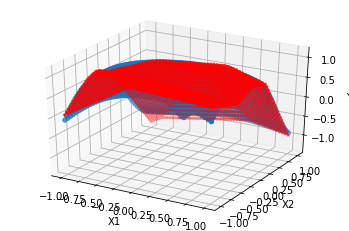

In [58]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden,
                             weights=w1_norm, bias=b1_norm,
                             optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, 1,
                          weights=w2_norm, bias=layer2.bias,
                          optimizer=optimizer)
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

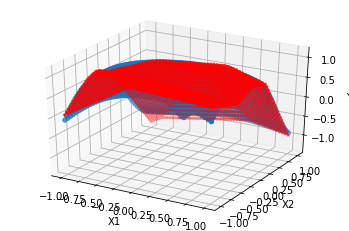

In [59]:
yout = net.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [60]:
np.abs(yout - yout_).sum()

2.8765878568037806e-13

In [61]:
((yout - yy)**2).mean(), ((yout_ - yy)**2).mean() ## there is no change in error..

(0.014252367122238903, 0.014252367122238903)